In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import utils as ut
import warnings
warnings.filterwarnings("ignore")

## Load data

In [3]:
df = pd.read_csv("data/csv/accidents_clean.csv")
df2 = pd.read_csv("data/csv/bsas_pop.csv")

## Summary of data

To perform our EDA we will take the clean data developed during the ETL processes. To see specifically the processes of transforming variables, complementing data and handling null or missing data, you can review the structure made in the ETL files

In [4]:
ut.data_summ(df)


Total rows:  716

Total full null rows:  0

Total full duplicate rows:  0


,Column,Data_type,No_miss_Qty,%Missing,Missing_Qty
0,Hechos_Id,[<class 'str'>],716,0.0,0
1,Número De Victimas,[<class 'int'>],716,0.0,0
2,Fecha,[<class 'str'>],716,0.0,0
3,Año,[<class 'int'>],716,0.0,0
4,Mes,[<class 'str'>],716,0.0,0
5,Dia,[<class 'int'>],716,0.0,0
6,Día Semana,[<class 'str'>],716,0.0,0
7,Estación,[<class 'str'>],716,0.0,0
8,Hora,[<class 'str'>],716,0.0,0
9,Franja Horaria,[<class 'int'>],716,0.0,0


Let's initially analyze the total number of victims. Then we will carry out a detailed analysis by time frames. 

In [5]:
total_victims = df['Número De Victimas'].sum()

print(f"The total number of victims is: {total_victims}")


The total number of victims is: 760


## Data Analysys by time variables

We have 760 victims. Now let's look at the distribution of that number of victims per year.

### Victims by year

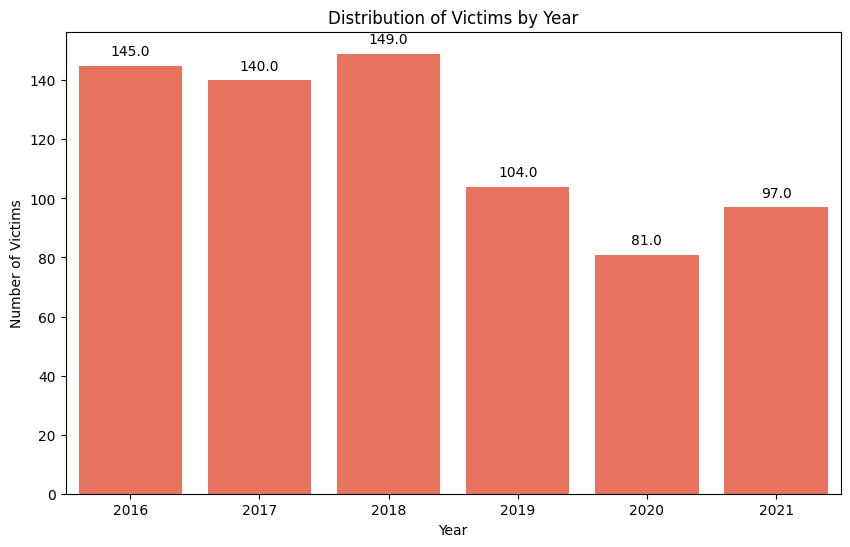

In [6]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Año', data=df, color='tomato')

# Add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Victims by Year')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.show()

We see that in 2019 the number of victims drops and in 2020 it drops considerably more than in previous years. This may surely be due to traffic restrictions on the streets due to the COVID-19 pandemic.

### Victims by month

Let's now see the behavior of the number of victims month by month for each year.

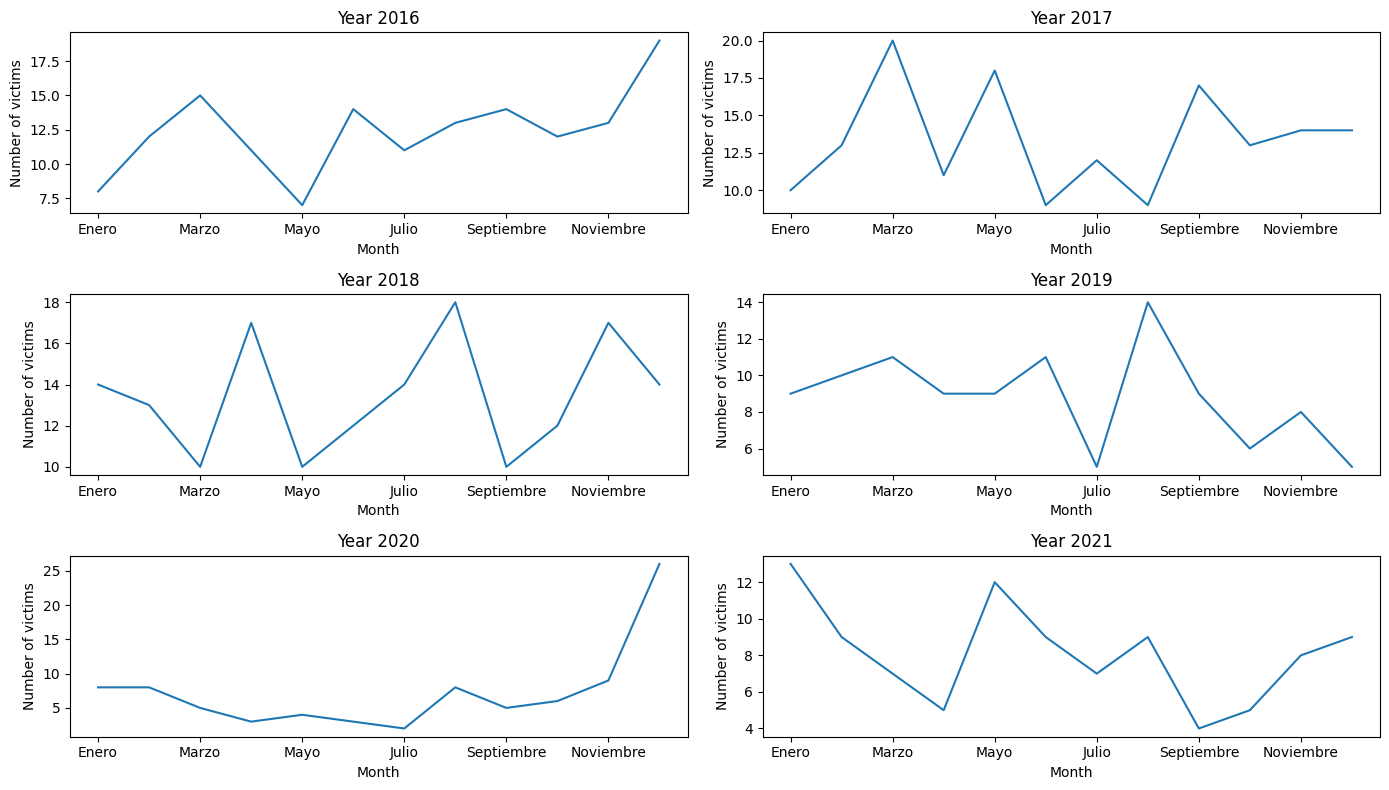

In [7]:
# Convertir la columna 'Mes' a tipo categórico con orden personalizado
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df['Mes'] = pd.Categorical(df['Mes'], categories=meses_ordenados, ordered=True)

# Se define el número de filas y columnas para la cuadrícula de subgráficos
n_filas = 3
n_columnas = 2

# Se crea una figura con subgráficos en una cuadrícula de 2x3
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(14, 8))

# Se itera a través de los años y crea un gráfico por año
for i, year in enumerate(df['Año'].unique()):
    fila = i // n_columnas
    columna = i % n_columnas
    
    # Se filtran los datos para el año actual y agrupa por mes
    data_mensual = (df[df['Año'] == year]
                    .groupby('Mes')
                    .agg({'Número De Victimas': 'sum'})
                    .sort_values('Mes'))  # Ordenar por valores de 'Mes'
    
    # Se configura el subgráfico actual
    ax = axes[fila, columna]
    data_mensual.plot(ax=ax, kind='line')
    ax.set_title('Year ' + str(year))
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of victims')
    ax.legend_ = None

# Se muestra y acomoda el gráfico
plt.tight_layout()
plt.show()

We can observe a general trend (except in 2019) that the number of victims increases towards the months of November and December

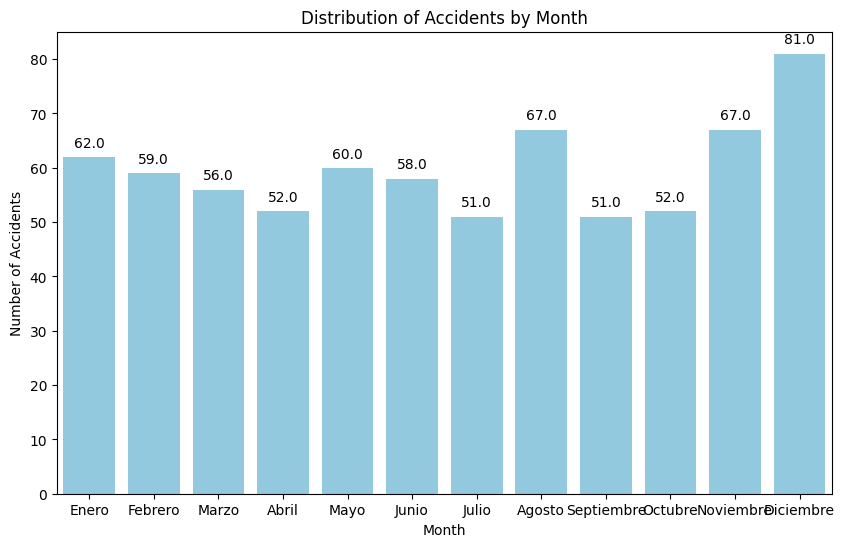

In [8]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Mes', data=df, color='skyblue')

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

The discrete graph effectively confirms our assessment, as we see that in the month of December, there are a greater number of accumulated victims (20% more than the next month with more victims and 35% more than the average number of victims per month).

### Accidents by season

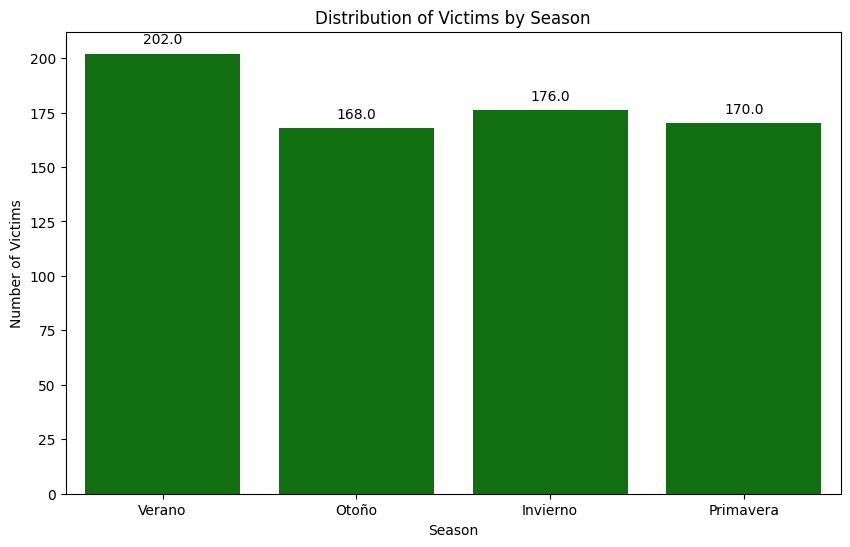

In [9]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Estación', data=df, color='green')

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Victims by Season')
plt.xlabel('Season')
plt.ylabel('Number of Victims')
plt.show()

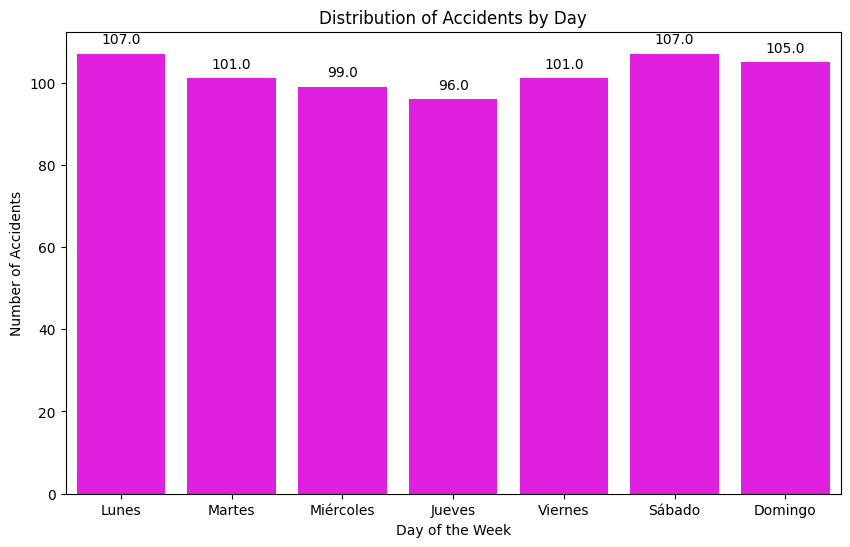

In [10]:
# Ordenar los días de la semana en el orden deseado
week_order = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Día Semana', data=df, order=week_order, color='magenta')

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Accidents by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

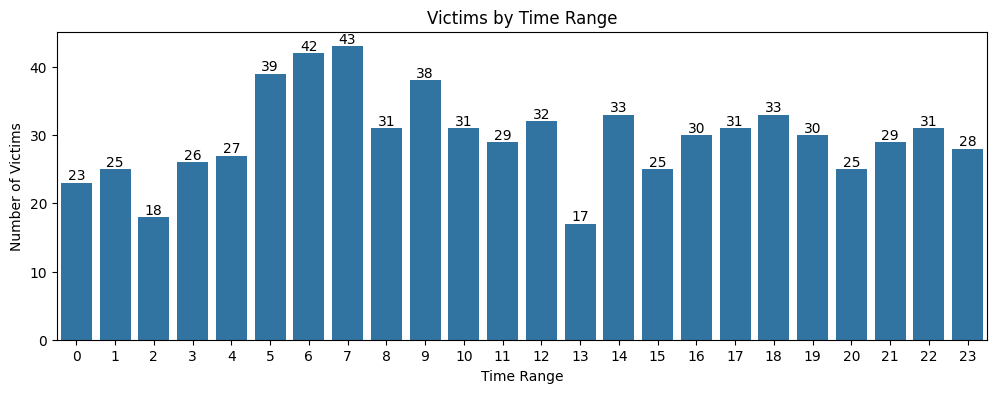

In [11]:
# Se cuenta la Número De Victimas por Franja Horaria
data = df['Franja Horaria'].value_counts().reset_index()
data.columns = ['Franja Horaria', 'Número De Victimas']

# Se ordena los datos por Franja Horaria
data = data.sort_values(by='Franja Horaria')

# Se crea el gráfico de barras
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='Franja Horaria', y='Número De Victimas', data=data)

ax.set_title('Victims by Time Range')
ax.set_xlabel('Time Range')
ax.set_ylabel('Number of Victims')

# Se agrega las cantidades en las barras
for index, row in data.iterrows():
    ax.annotate(f'{row["Número De Victimas"]}', (row["Franja Horaria"], row["Número De Victimas"]), ha='center', va='bottom')

# Se muestra el gráfico
plt.show()


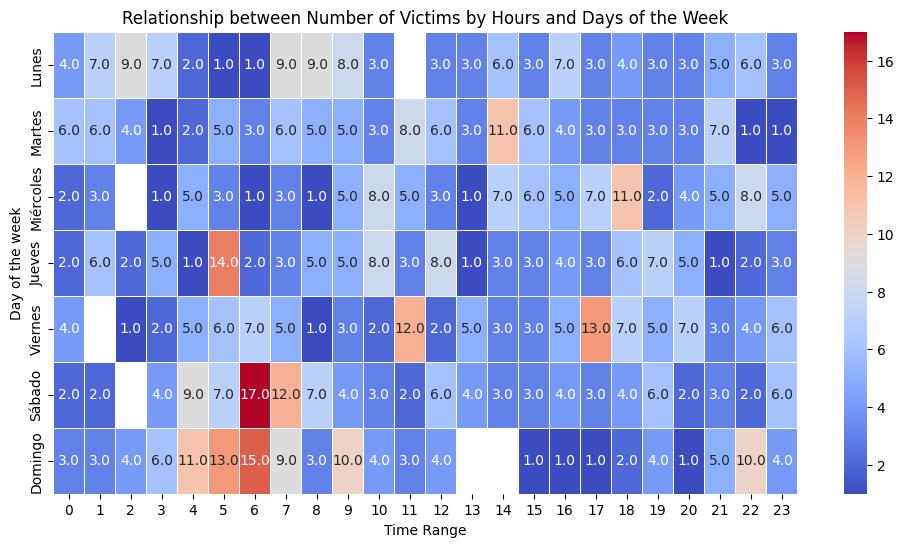

In [12]:
#Agrupa los datos en cantidad de victimas por dia de la Semana y horas 
data = df.groupby(['Día Semana', "Franja Horaria"])['Número De Victimas'].sum().reset_index()
#data["Hora"]=data["Hora"].astype("Int64")

# Define el orden de los días de la Semana
orden_dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Crea una columna 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la Semana
data['Orden_dia_semana'] = data['Día Semana'].apply(lambda x: orden_dias_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la Semana
data = data.sort_values(by='Orden_dia_semana')

# Crear una tabla pivot para los datos
pivot_data = data.pivot_table(index= 'Día Semana', columns='Franja Horaria', values='Número De Victimas', aggfunc='sum')
pivot_data = pivot_data.reindex(orden_dias_semana)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)

# Configurar etiquetas y título
plt.xlabel('Time Range')
plt.ylabel('Day of the week')
plt.title('Relationship between Number of Victims by Hours and Days of the Week')

# Mostrar el gráfico
plt.show()

### Conclusions

## Analysis by location and geographic variables

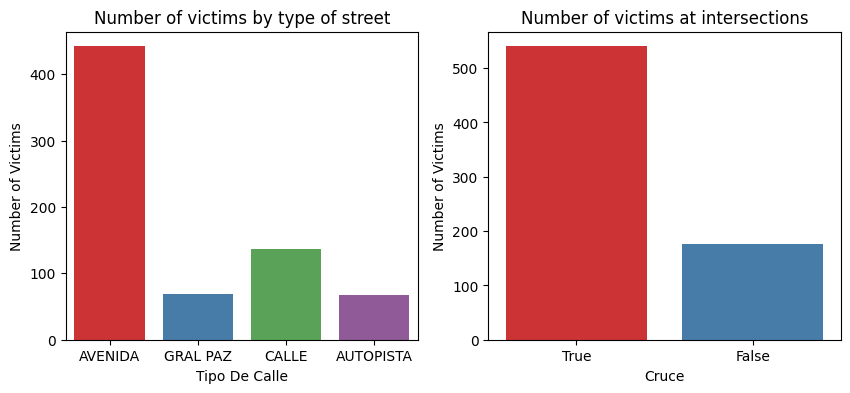

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primer subgráfico
unique_colors_street_type = sns.color_palette("Set1", n_colors=len(df['Tipo De Calle'].unique()))
for i, street_type in enumerate(df['Tipo De Calle'].unique()):
    sns.countplot(data=df[df['Tipo De Calle'] == street_type], x='Tipo De Calle', ax=axes[0], color=unique_colors_street_type[i])

axes[0].set_title('Number of victims by type of street')
axes[0].set_ylabel('Number of Victims')

# Segundo subgráfico
unique_colors_crossroad = sns.color_palette("Set1", n_colors=len(df['Cruce'].unique()))
for i, crossroad in enumerate(df['Cruce'].unique()):
    sns.countplot(data=df[df['Cruce'] == crossroad], x='Cruce', ax=axes[1], color=unique_colors_crossroad[i])

axes[1].set_title('Number of victims at intersections')
axes[1].set_ylabel('Number of Victims')

plt.show()

We can see that the greatest number of events with fatalities occur on avenues and particularly at street intersections.

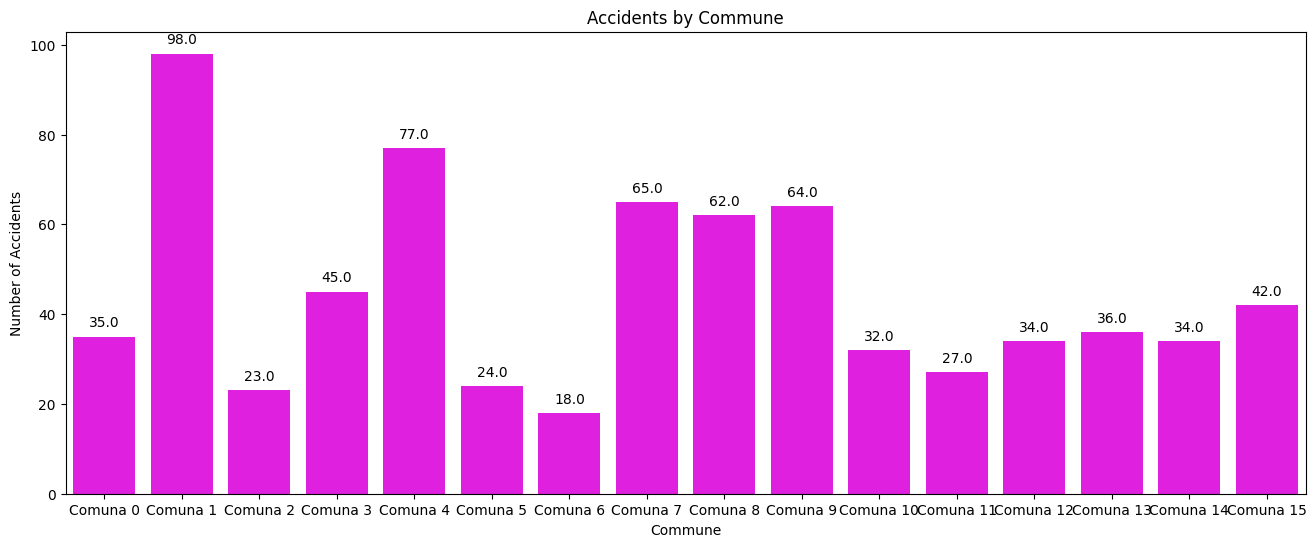

In [14]:
df['Comuna'] = pd.Categorical(df['Comuna'], categories=['Comuna 0', 'Comuna 1', 'Comuna 2', 'Comuna 3', 'Comuna 4', 'Comuna 5', 'Comuna 6', 'Comuna 7', 'Comuna 8', 'Comuna 9', 'Comuna 10', 'Comuna 11', 'Comuna 12', 'Comuna 13', 'Comuna 14', 'Comuna 15'], ordered=True)

# Crear un gráfico de barras ordenado por 'Comuna'
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='Comuna', data=df, color='magenta', order=df['Comuna'].cat.categories)

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Accidents by Commune')
plt.xlabel('Commune')
plt.ylabel('Number of Accidents')
plt.show()

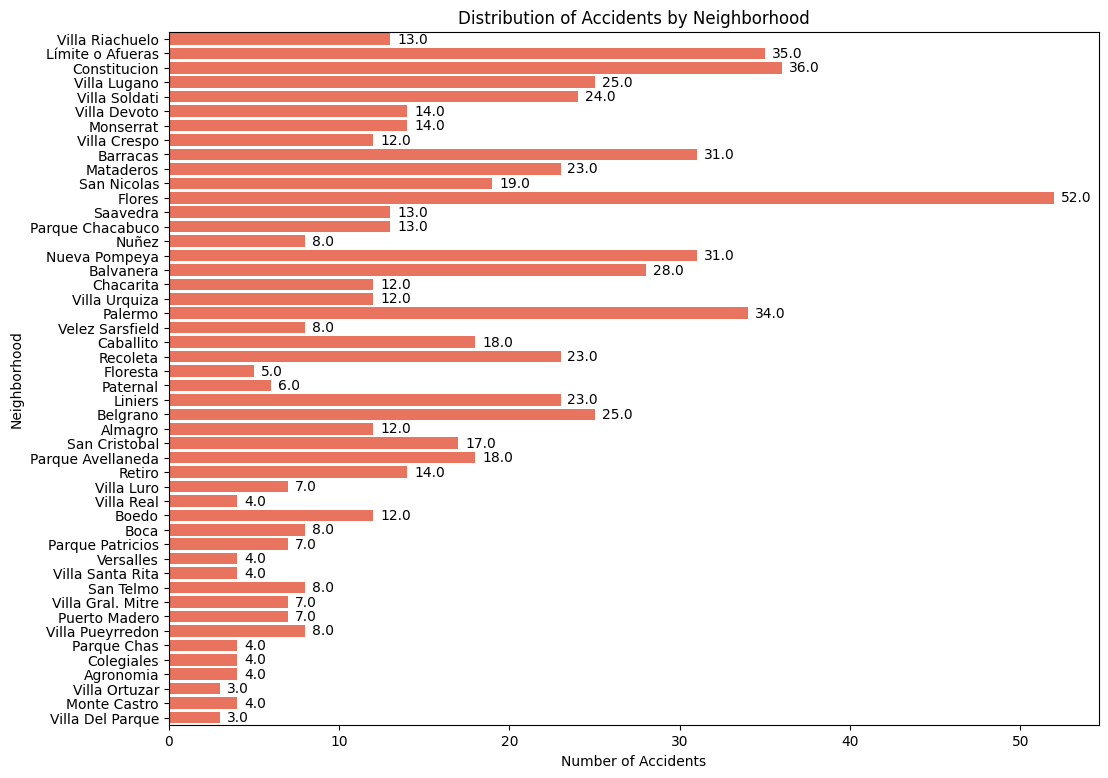

In [15]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 9))
ax = sns.countplot(y='Barrio', data=df, color='tomato', orient='horizontal')

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Distribution of Accidents by Neighborhood')
plt.xlabel('Number of Accidents')
plt.ylabel('Neighborhood')
plt.show()


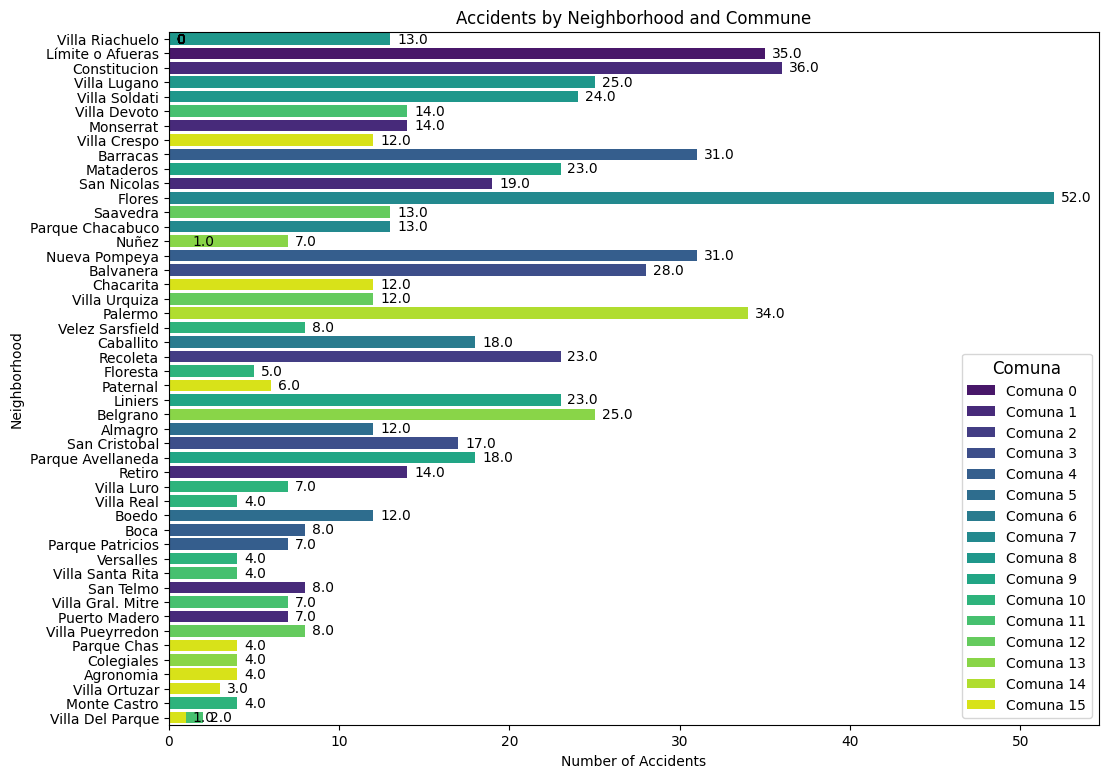

In [16]:
# Asignar colores diferentes a cada comuna
comuna_colors = sns.color_palette("viridis", n_colors=len(df['Comuna'].cat.categories))

# Crear un gráfico de barras organizado por comuna
plt.figure(figsize=(12, 9))
ax = sns.countplot(y='Barrio', data=df, hue='Comuna', palette=comuna_colors, orient='horizontal', dodge=False, saturation=1)

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Accidents by Neighborhood and Commune')
plt.xlabel('Number of Accidents')
plt.ylabel('Neighborhood')
plt.legend(title='Comuna', title_fontsize='12')
plt.show()

In [22]:
import plotly.express as px

fig = px.scatter_mapbox(
    df,
    lat='Pos Y',
    lon='Pos X',
    zoom=10.8,
    width=800,
    height=680
)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    title_text='Road Accidents',
    title_font=dict(size=24)
)
fig.update_traces(marker=dict(size=7, color='#113946'))

fig.show()

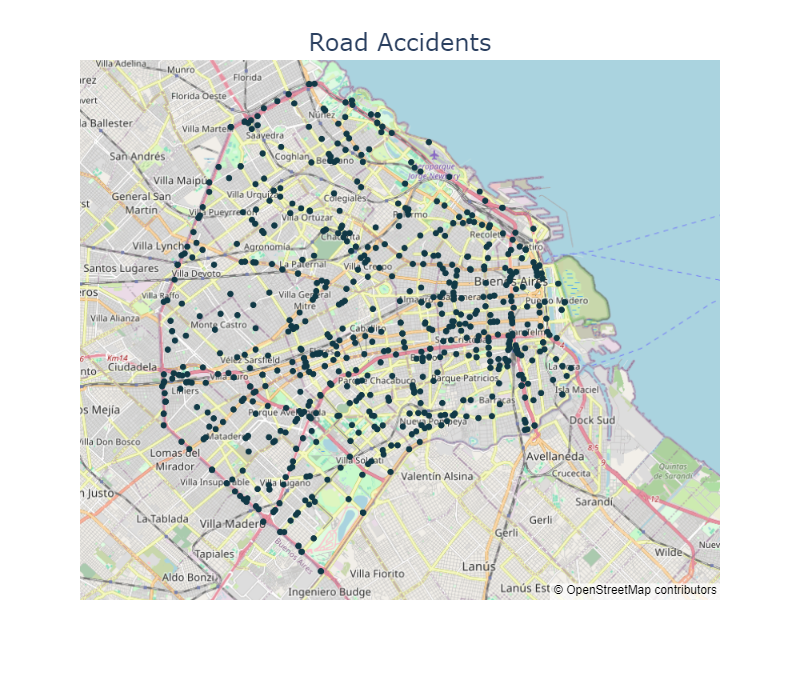

In [23]:
from IPython.display import Image, display
# Image path
image_path = 'images/all_accidents.png'  

# Show image
display(Image(filename=image_path))